In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [3]:
dataset = pd.read_csv("C:/Users/ELCOT/Downloads/WORK VI VII VIII (1)/WORK VII/loan_borowwer_data.csv")
print(dataset.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [4]:
print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [5]:
print (dataset.describe())

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.0000

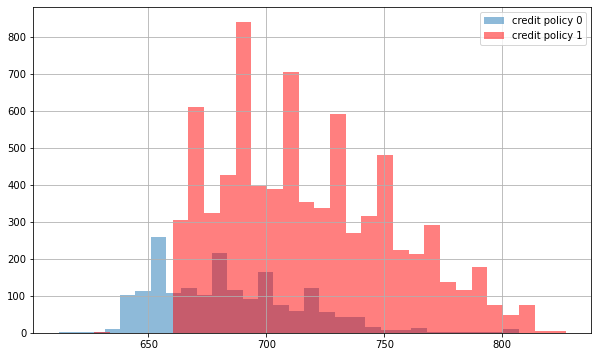

In [6]:
plt.figure(figsize=(10,6))
dataset[dataset['credit.policy']==0]['fico'].hist(bins=30,alpha=0.5,label='credit policy 0')
dataset[dataset['credit.policy']==1]['fico'].hist(color='red',bins=30,alpha=0.5,label='credit policy 1')
plt.legend()
plt.show()

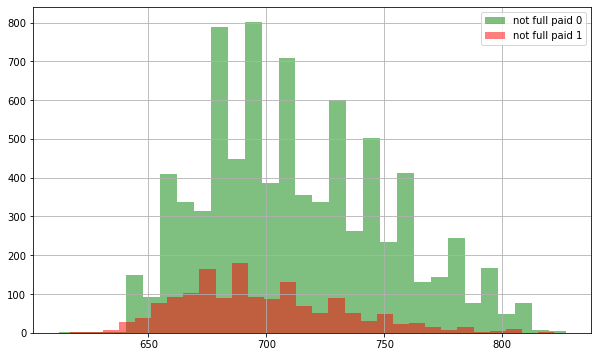

In [7]:
plt.figure(figsize=(10,6))
dataset[dataset['not.fully.paid']==0]['fico'].hist(color='green',bins=30,alpha=0.5,label='not full paid 0')
dataset[dataset['not.fully.paid']==1]['fico'].hist(color='red',bins=30,alpha=0.5,label='not full paid 1')
plt.legend()
plt.show()

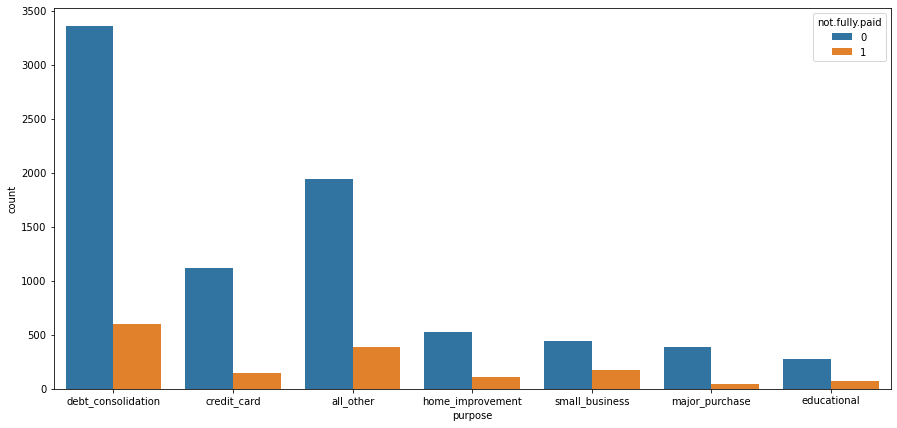

In [8]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.countplot(x=dataset['purpose'],hue=dataset['not.fully.paid'])
plt.show()

In [10]:
data = pd.get_dummies(dataset,columns=['purpose'],drop_first=True)
print (data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

In [11]:
final_data = data[:]
final_data.drop(['inq.last.6mths'], axis=1, inplace=True)
final_data.drop(['not.fully.paid'], axis=1, inplace=True)
predict_var = final_data.columns
print (list(predict_var))

['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']


In [12]:
from sklearn.model_selection import train_test_split

x = final_data
y = data['not.fully.paid']
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=81) 


In [13]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print (metrics.accuracy_score(prediction, y_test))

0.7317327766179541


In [14]:
print (metrics.confusion_matrix(prediction,y_test))

[[2018  344]
 [ 427   85]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
print (metrics.accuracy_score(pred, y_test))

0.8475991649269311


In [16]:
print (metrics.confusion_matrix(pred,y_test))

[[2432  425]
 [  13    4]]


In [17]:
#The model, random forest, performed better for lower NPAs ?